<a href="https://colab.research.google.com/github/RitulMohan/tf.Keras/blob/main/CNNonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

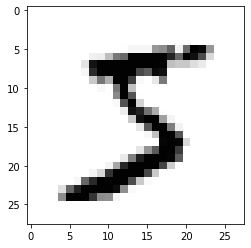

In [9]:
plt.imshow(X_train[0], cmap='Greys')

In [10]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)



## As we can see Y_train is a series of arrays, 

### if we do not use one-hot encoding, the network will think that y_train is continuous and will predict stuff such as 5.5, 5.6... etc

### we need the network to understand that this is a multiclass classification problem 

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
Y_train.shape

(60000,)

In [14]:
y_ex = to_categorical(Y_train)
y_ex

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
print(Y_train[0])
print(y_ex[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
y_cat_test = to_categorical(Y_test)

In [17]:
y_cat_train = to_categorical(Y_train) 

Normalizing


In [18]:
X_train = X_train /255
X_test = X_test/255  

We need to tell the network that there is only 1 color channel 

so we **reshape** the training set and the test set 


In [ ]:
X_train.reshape(60000,28,28,1)
X_test.reshape(10000,28,28,1)

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

28/7 = 4, so we dont need padding 

Apply padding by **'same'** and if we dont need padding apply **'valid'**


In [22]:
model = Sequential([

Conv2D(filters =32, kernel_size=(4,4), input_shape =(28,28,1), activation ='relu'), 
MaxPool2D(pool_size =(2,2)),                    
Flatten(),
Dense(128, activation ='relu'), 
Dense(10, activation ='softmax') 

]) 

In [23]:
model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor ='val_loss', patience =1)

In [25]:
model.fit(X_train, y_cat_train, epochs =10, validation_data = (X_test, y_cat_test), callbacks = [early])

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1372 - accuracy: 0.9596 - val_loss: 0.0533 - val_accuracy: 0.9828
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.0443 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0390 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0411 - val_accuracy: 0.9884


In [26]:
metrics = pd.DataFrame(model.history.history)

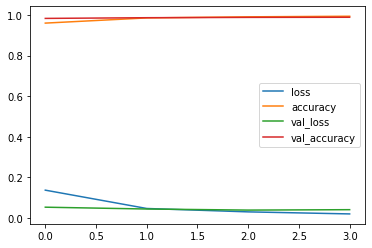

In [27]:
metrics.plot()

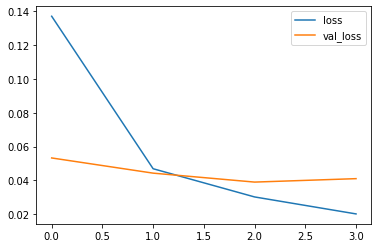

In [29]:
metrics[['loss', 'val_loss']].plot()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
my_im = X_test[5]

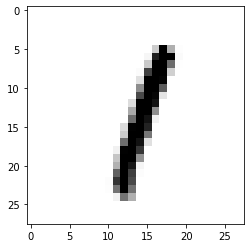

In [38]:
plt.imshow(my_im, cmap ='Greys')

In [50]:
model.predict(my_im.reshape(1,28,28,1)).argmax()

1